In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint

## Problem 2:

In [2]:
def Emission_coeff(r):
    return 1/(r**2)

def Emission_coeff_2(r):
    return np.log(r/L)

def Absorption_coeff(r,L):
    return r

def Absorption_coeff_2(r,L):
    return r*np.exp(-r/L)

def Optical_depth(b,L,func):
    h = 0.01
    a = 0.000001
    Distance = []
    Tau_array = []
    while b<L+h:
        tau,tau_error = quad(func,a,b,args=(L,))
        Distance.append(b)
        Tau_array.append(tau)
        b = b+h
    return np.array(Distance),np.array(Tau_array)

### For $\alpha_\nu(r) = r$
#### Theoretical expression of optical depth: $\tau(r) = r^2/2$

Text(0.5, 1.0, 'Optical depth for various values of L')

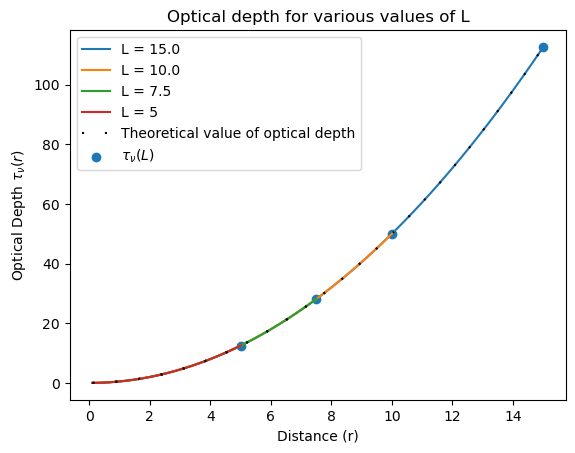

In [3]:
L = [15.0,10.0,7.5,5]
for i in range(len(L)):
    r = np.linspace(0.1,L[i],100)
    plt.plot(Optical_depth(0.1,L[i],Absorption_coeff)[0],Optical_depth(0.1,L[i],Absorption_coeff)[1],label = "L = "+str(L[i]))
    if i==len(L)-1:
        plt.plot(r,r**2/2,linestyle = (0, (1, 10)),color = "black",label = "Theoretical value of optical depth")
    else:
        plt.plot(r,r**2/2,linestyle = (0, (1, 10)),color = "black")
plt.scatter(L,np.array(L)**2/2,label = r"$\tau_\nu(L)$")
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Optical Depth "+r"$\tau_\nu(r)$")
plt.title("Optical depth for various values of L")

### For $\alpha_\nu(r) = re^{-r/L}$
#### Thepretical expression of optical depth: $\tau(r) = L(L-e^{-r/L}(L+r))$

Text(0.5, 1.0, 'Optical depth for various values of L')

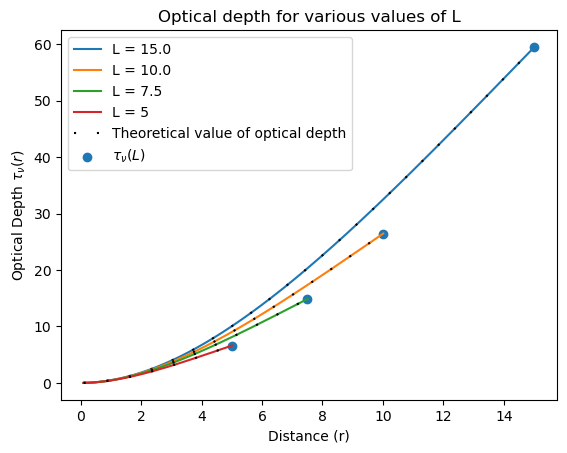

In [4]:
L = [15.0,10.0,7.5,5]
for i in range(len(L)):
    r = np.linspace(0.1,L[i],100)
    plt.plot(Optical_depth(0.1,L[i],Absorption_coeff_2)[0],Optical_depth(0.1,L[i],Absorption_coeff_2)[1],label = "L = "+str(L[i]))
    if i==len(L)-1:
        plt.plot(r,L[i]*(L[i]-np.exp(-r/L[i])*(r+L[i])),linestyle = (0, (1, 10)),color = "black",label = "Theoretical value of optical depth")
    else:
        plt.plot(r,L[i]*(L[i]-np.exp(-r/L[i])*(r+L[i])),linestyle = (0, (1, 10)),color = "black")
plt.scatter(L,-2*np.array(L)**2/np.exp(1)+np.array(L)**2,label = r"$\tau_\nu(L)$")
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Optical Depth "+r"$\tau_\nu(r)$")
plt.title("Optical depth for various values of L")

### Brightness: 
We will solve the following ODE to find brightness.
\begin{equation}\frac{dI_\nu}{ds} = -\alpha_\nu I_\nu+j_\nu \end{equation}

In [5]:
def dI_dr_1(I,r):
    return -r*I+1/(r**2)
def dI_dr_2(I,r):
    return -r*np.exp(-r/L)*I+np.log(r/L)

#### $1) \;\;j_\nu(r) = 1/r^2\;;\;\alpha_\nu(r) = r$

#### Plotting brightness for different initial conditions and different L.

In [6]:
I_0 = [2,6,10,20,100,200,400,800]
L = 1.0
r = np.linspace(0.1,L,100)
sol = odeint(func=dI_dr_1,y0 = I_0,t = r)

[Text(0, 0.5, 'Brightness - $I_\\nu(r)$')]

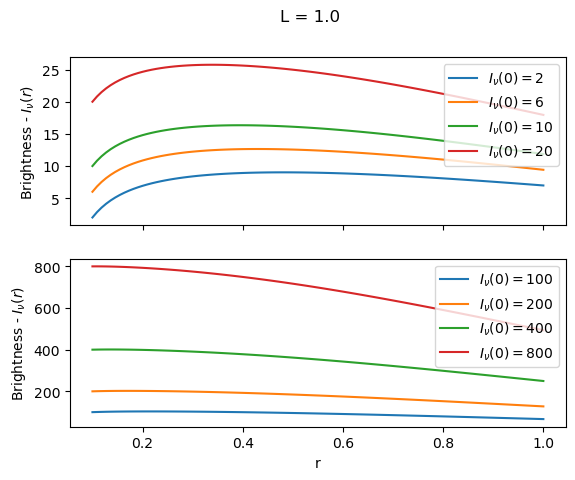

In [7]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("L = "+str(L))
for i in range(4):
    axs[0].plot(r,sol[:,i],label = r"$I_\nu(0) = $"+str(I_0[i]))
    axs[1].plot(r,sol[:,i+4],label = r"$I_\nu(0) = $"+str(I_0[i+4]))
    #axs[2].plot(r,sol[:,i+4*2],label = r"$I_\nu(0) = $"+str(I_0[i+4*2]))
axs[0].legend()
axs[1].legend()
plt.xlabel("r")
axs[0].set(ylabel = "Brightness - "+r"$I_\nu(r)$")
axs[1].set(ylabel = "Brightness - "+r"$I_\nu(r)$")

In [8]:
I_0 = [2,6,10,20,100,200,400,800]
L = 5.0
r = np.linspace(0.1,L,100)
sol = odeint(func=dI_dr_1,y0 = I_0,t = r)

[Text(0, 0.5, 'Brightness - $I_\\nu(r)$')]

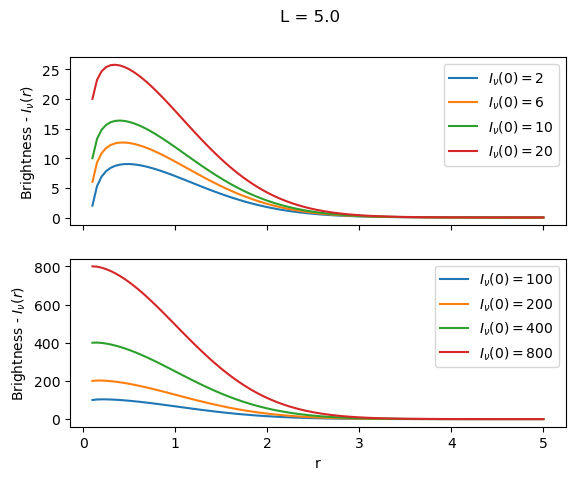

In [9]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("L = "+str(L))
for i in range(4):
    axs[0].plot(r,sol[:,i],label = r"$I_\nu(0) = $"+str(I_0[i]))
    axs[1].plot(r,sol[:,i+4],label = r"$I_\nu(0) = $"+str(I_0[i+4]))
    #axs[2].plot(r,sol[:,i+4*2],label = r"$I_\nu(0) = $"+str(I_0[i+4*2]))
axs[0].legend()
axs[1].legend()
plt.xlabel("r")
axs[0].set(ylabel = "Brightness - "+r"$I_\nu(r)$")
axs[1].set(ylabel = "Brightness - "+r"$I_\nu(r)$")

In [10]:
I_0 = [2,6,10,20,100,200,400,800]
L = 15.0
r = np.linspace(0.1,L,100)
sol = odeint(func=dI_dr_1,y0 = I_0,t = r)

[Text(0, 0.5, 'Brightness - $I_\\nu(r)$')]

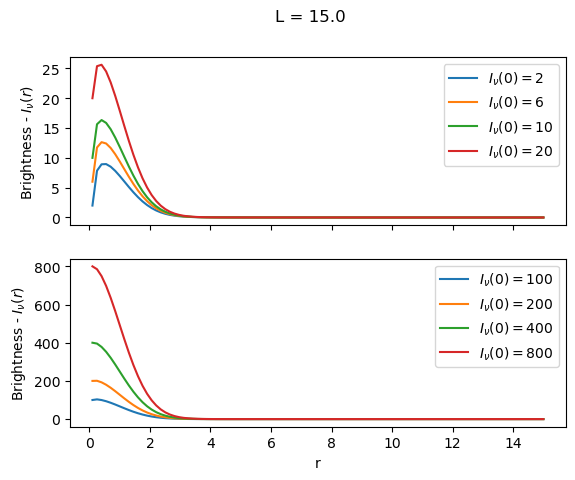

In [11]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("L = "+str(L))
for i in range(4):
    axs[0].plot(r,sol[:,i],label = r"$I_\nu(0) = $"+str(I_0[i]))
    axs[1].plot(r,sol[:,i+4],label = r"$I_\nu(0) = $"+str(I_0[i+4]))
    #axs[2].plot(r,sol[:,i+4*2],label = r"$I_\nu(0) = $"+str(I_0[i+4*2]))
axs[0].legend()
axs[1].legend()
plt.xlabel("r")
axs[0].set(ylabel = "Brightness - "+r"$I_\nu(r)$")
axs[1].set(ylabel = "Brightness - "+r"$I_\nu(r)$")

#### $2) \;\;j_\nu(r) = \text{ln}(r/L)\;;\;\alpha_\nu(r) = re^{-r/L}$

In [12]:
I_0 = [10,20,30,40,100,200,400,800]
L = 1.0
r = np.linspace(0.1,L,100)
sol = odeint(func=dI_dr_2,y0 = I_0,t = r)

[Text(0, 0.5, 'Brightness - $I_\\nu(r)$')]

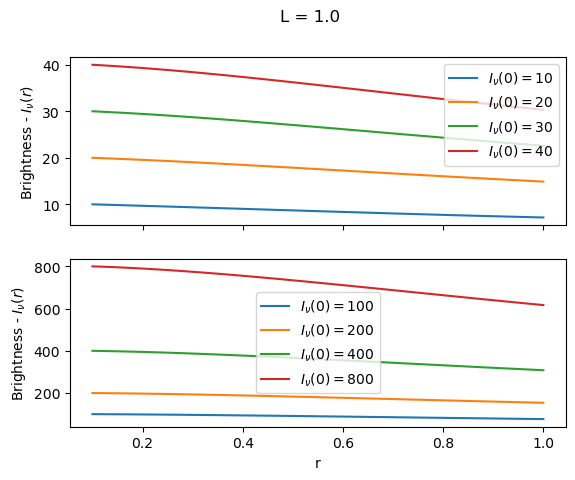

In [13]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("L = "+str(L))
for i in range(4):
    axs[0].plot(r,sol[:,i],label = r"$I_\nu(0) = $"+str(I_0[i]))
    axs[1].plot(r,sol[:,i+4],label = r"$I_\nu(0) = $"+str(I_0[i+4]))
    #axs[2].plot(r,sol[:,i+4*2],label = r"$I_\nu(0) = $"+str(I_0[i+4*2]))
axs[0].legend()
axs[1].legend()
plt.xlabel("r")
axs[0].set(ylabel = "Brightness - "+r"$I_\nu(r)$")
axs[1].set(ylabel = "Brightness - "+r"$I_\nu(r)$")

In [14]:
I_0 = [10,20,30,40,100,200,400,800]
L = 5.0
r = np.linspace(0.1,L,100)
sol = odeint(func=dI_dr_2,y0 = I_0,t = r)

[Text(0, 0.5, 'Brightness - $I_\\nu(r)$')]

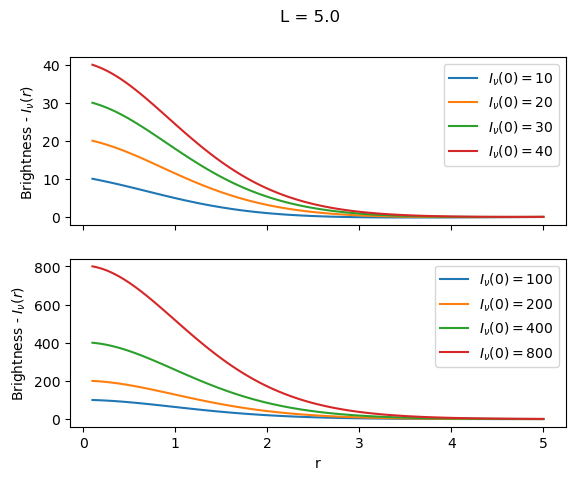

In [15]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("L = "+str(L))
for i in range(4):
    axs[0].plot(r,sol[:,i],label = r"$I_\nu(0) = $"+str(I_0[i]))
    axs[1].plot(r,sol[:,i+4],label = r"$I_\nu(0) = $"+str(I_0[i+4]))
    #axs[2].plot(r,sol[:,i+4*2],label = r"$I_\nu(0) = $"+str(I_0[i+4*2]))
axs[0].legend()
axs[1].legend()
plt.xlabel("r")
axs[0].set(ylabel = "Brightness - "+r"$I_\nu(r)$")
axs[1].set(ylabel = "Brightness - "+r"$I_\nu(r)$")

In [16]:
I_0 = [10,20,30,40,100,200,400,800]
L = 15.0
r = np.linspace(0.1,L,100)
sol = odeint(func=dI_dr_2,y0 = I_0,t = r)

[Text(0, 0.5, 'Brightness - $I_\\nu(r)$')]

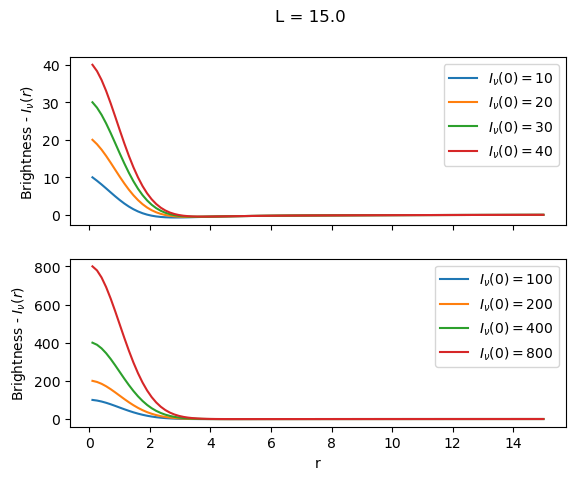

In [17]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("L = "+str(L))
for i in range(4):
    axs[0].plot(r,sol[:,i],label = r"$I_\nu(0) = $"+str(I_0[i]))
    axs[1].plot(r,sol[:,i+4],label = r"$I_\nu(0) = $"+str(I_0[i+4]))
    #axs[2].plot(r,sol[:,i+4*2],label = r"$I_\nu(0) = $"+str(I_0[i+4*2]))
axs[0].legend()
axs[1].legend()
plt.xlabel("r")
axs[0].set(ylabel = "Brightness - "+r"$I_\nu(r)$")
axs[1].set(ylabel = "Brightness - "+r"$I_\nu(r)$")

## Problem 5:

In [18]:
def absorption_coeff_3(r,L):
    return (alpha_0+sigma_0)*r**2
def absorption_coeff_4(r,L):
    return (alpha_0+sigma_0)*np.log(r)
# We will use same def for scattering since, scattering coeff is taken to be same as absorption coefficient.

### Optical depth for $\alpha_\nu = r^2$

Text(0.5, 1.0, 'Optical depth for various values of L')

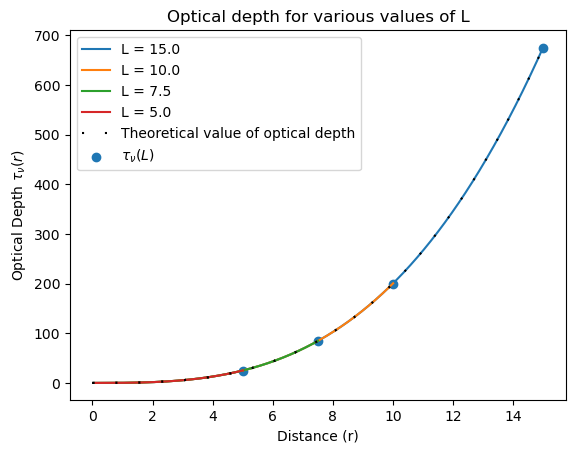

In [19]:
L = [15.0,10.0,7.5,5.0]
alpha_0 = 0.2
sigma_0 = 0.4
for i in range(len(L)):
    r = np.linspace(0,L[i],100)
    plt.plot(Optical_depth(0.1,L[i],absorption_coeff_3)[0],Optical_depth(0.1,L[i],absorption_coeff_3)[1],label = "L = "+str(L[i]))
    if i==len(L)-1:
        plt.plot(r,(alpha_0+sigma_0)*r**3/3,linestyle = (0, (1, 10)),color = "black",label = "Theoretical value of optical depth")
    else:
        plt.plot(r,(alpha_0+sigma_0)*r**3/3,linestyle = (0, (1, 10)),color = "black")
plt.scatter(L,(alpha_0+sigma_0)*np.array(L)**3/3,label = r"$\tau_\nu(L)$")
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Optical Depth "+r"$\tau_\nu(r)$")
plt.title("Optical depth for various values of L")

Text(0.5, 1.0, 'Optical depth for various values of $\\alpha_o$')

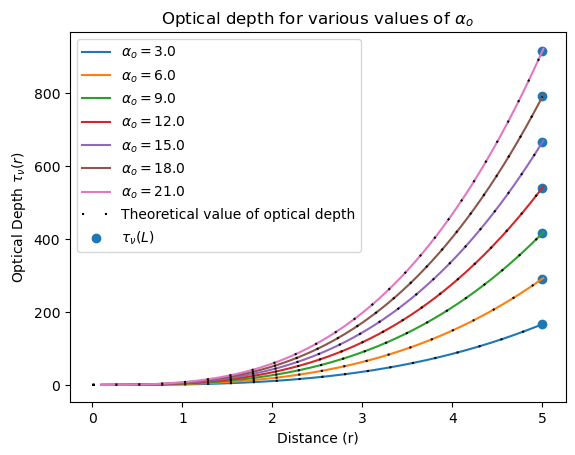

In [20]:
L = 5.0
sigma_0 = 1.0
alpha_0_arr = np.linspace(3.0,21.0,7)
for i in range(len(alpha_0_arr)):
    r = np.linspace(0.001,L,100)
    alpha_0 = alpha_0_arr[i]
    plt.plot(Optical_depth(0.1,L,absorption_coeff_3)[0],Optical_depth(0.1,L,absorption_coeff_3)[1],label = r"$\alpha_o = $"+str(alpha_0_arr[i]))
    if i==len(alpha_0_arr)-1:
        plt.plot(r,(alpha_0_arr[i]+sigma_0)*r**3/3,linestyle = (0, (1, 10)),color = "black",label = "Theoretical value of optical depth")
    else:
        plt.plot(r,(alpha_0_arr[i]+sigma_0)*r**3/3,linestyle = (0, (1, 10)),color = "black")
plt.scatter(np.ones(len(alpha_0_arr))*L,(alpha_0_arr+sigma_0)*np.array(L)**3/3,label = r"$\tau_\nu(L)$")
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Optical Depth "+r"$\tau_\nu(r)$")
plt.title("Optical depth for various values of "+r'$\alpha_o$')

### Optical depth for $\alpha_\nu = \text{ln}(r)$

Text(0.5, 1.0, 'Optical depth for various values of L')

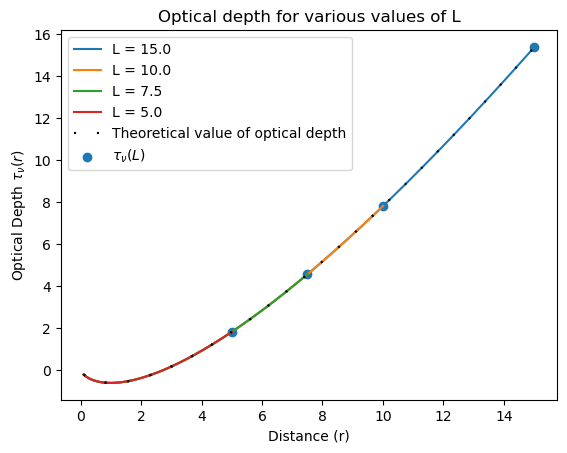

In [21]:
L = [15.0,10.0,7.5,5.0]
alpha_0 = 0.2
sigma_0 = 0.4
for i in range(len(L)):
    r = np.linspace(0.1,L[i],100)
    plt.plot(Optical_depth(0.1,L[i],absorption_coeff_4)[0],Optical_depth(0.1,L[i],absorption_coeff_4)[1],label = "L = "+str(L[i]))
    if i==len(L)-1:
        plt.plot(r,(alpha_0+sigma_0)*r*(np.log(r)-1),linestyle = (0, (1, 10)),color = "black",label = "Theoretical value of optical depth")
    else:
        plt.plot(r,(alpha_0+sigma_0)*r*(np.log(r)-1),linestyle = (0, (1, 10)),color = "black")
plt.scatter(L,(alpha_0+sigma_0)*np.array(L)*(np.log(np.array(L))-1),label = r"$\tau_\nu(L)$")
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Optical Depth "+r"$\tau_\nu(r)$")
plt.title("Optical depth for various values of L")

Text(0.5, 1.0, 'Optical depth for various values of $\\alpha_o$')

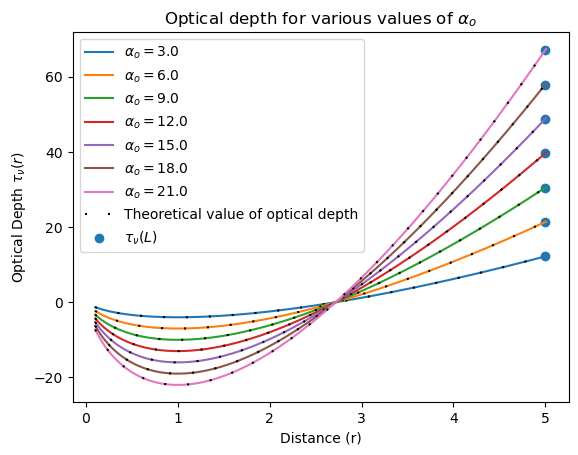

In [22]:
L = 5.0
sigma_0 = 1.0
alpha_0_arr = np.linspace(3.0,21.0,7)
for i in range(len(alpha_0_arr)):
    r = np.linspace(0.1,L,100)
    alpha_0 = alpha_0_arr[i]
    plt.plot(Optical_depth(0.1,L,absorption_coeff_4)[0],Optical_depth(0.1,L,absorption_coeff_4)[1],label = r"$\alpha_o = $"+str(alpha_0_arr[i]))
    if i==len(alpha_0_arr)-1:
        plt.plot(r,(alpha_0_arr[i]+sigma_0)*r*(np.log(r)-1),linestyle = (0, (1, 10)),color = "black",label = "Theoretical value of optical depth")
    else:
        plt.plot(r,(alpha_0_arr[i]+sigma_0)*r*(np.log(r)-1),linestyle = (0, (1, 10)),color = "black")
plt.scatter(np.ones(len(alpha_0_arr))*L,(alpha_0_arr+sigma_0)*L*(np.log(L)-1),label = r"$\tau_\nu(L)$")
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Optical Depth "+r"$\tau_\nu(r)$")
plt.title("Optical depth for various values of "+r'$\alpha_o$')

In [23]:
def Observed_intensity(I_0,L):
    r = np.linspace(0.1,L,200)
    return r,I_0*np.exp(-(alpha_0+sigma_0)*(r**3/3))
def Observed_intensity_2(I_0,L):
    r = np.linspace(0.1,L,200)
    return r,I_0*np.exp(-(alpha_0+sigma_0)*(r*(np.log(r)-1)))

### Observed Intensity for $\alpha_\nu = \alpha_o r^2$ and $\sigma_\nu = \sigma_or^2$

Text(0.5, 1.0, 'Observed intensity for various values of $\\alpha_o$')

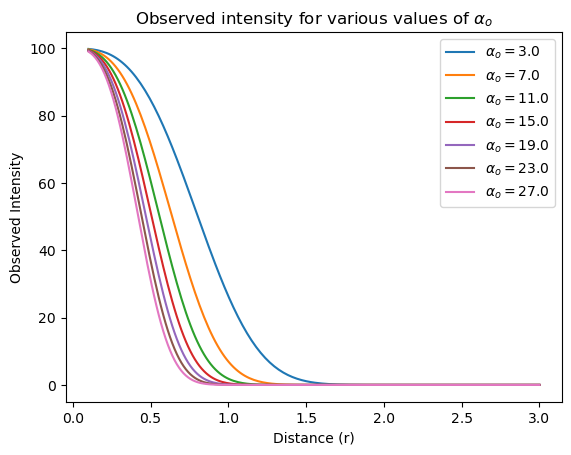

In [24]:
L = 3.0
I_0 = 100
sigma_0 = 1.0
alpha_0_arr = np.linspace(3.0,27.0,7)
for i in range(len(alpha_0_arr)):
    alpha_0 = alpha_0_arr[i]
    plt.plot(Observed_intensity(I_0,L)[0],Observed_intensity(I_0,L)[1],label = r"$\alpha_o = $"+str(np.round(alpha_0_arr[i],2)))
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Observed Intensity")
plt.title("Observed intensity for various values of "+r'$\alpha_o$')

Text(0.5, 1.0, 'Observed intensity for various values of $I_o$')

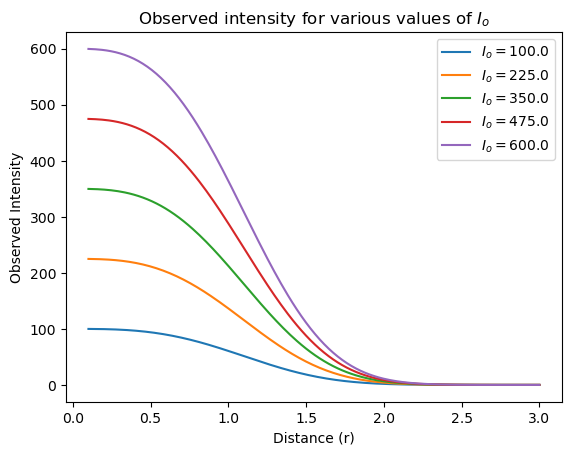

In [25]:
L = 3.0
I_0_arr = np.linspace(100,600,5)
sigma_0 = 1.0
alpha_0 = 0.5
for i in range(len(I_0_arr)):
    I_0 = I_0_arr[i]
    plt.plot(Observed_intensity(I_0,L)[0],Observed_intensity(I_0,L)[1],label = r"$I_o = $"+str(np.round(I_0_arr[i],2)))
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Observed Intensity")
plt.title("Observed intensity for various values of "+r'$I_o$')

### Observed Intensity for $\alpha_\nu = \alpha_o \text{ln}(r)$ and $\sigma_\nu = \sigma_o \text{ln}(r)$

Text(0.5, 1.0, 'Observed intensity for various values of $\\alpha_o$')

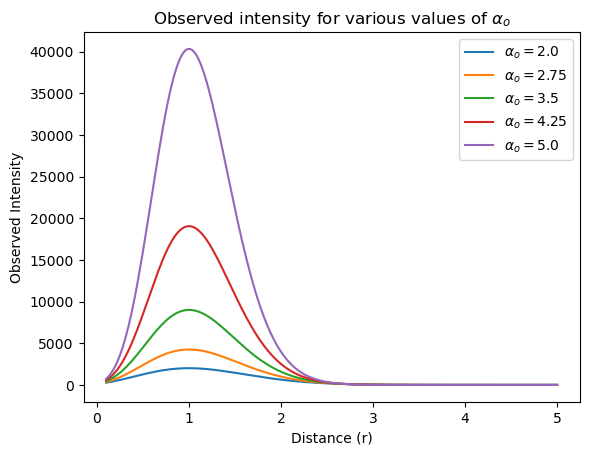

In [26]:
L = 5.0
I_0 = 100
sigma_0 = 1.0
alpha_0_arr = np.linspace(2.0,5.0,5)
for i in range(len(alpha_0_arr)):
    alpha_0 = alpha_0_arr[i]
    plt.plot(Observed_intensity_2(I_0,L)[0],Observed_intensity_2(I_0,L)[1],label = r"$\alpha_o = $"+str(np.round(alpha_0_arr[i],2)))
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Observed Intensity")
plt.title("Observed intensity for various values of "+r'$\alpha_o$')

Text(0.5, 1.0, 'Observed intensity for various values of $I_o$')

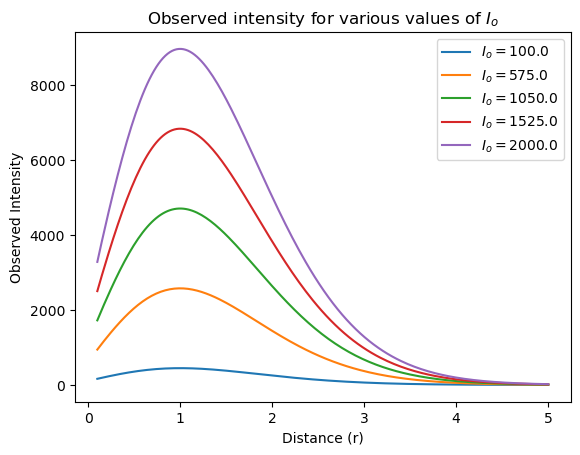

In [27]:
L = 5.0
I_0_arr = np.linspace(100,2000,5)
sigma_0 = 1.0
alpha_0 = 0.5
for i in range(len(I_0_arr)):
    I_0 = I_0_arr[i]
    plt.plot(Observed_intensity_2(I_0,L)[0],Observed_intensity_2(I_0,L)[1],label = r"$I_o = $"+str(np.round(I_0_arr[i],2)))
plt.xlabel("Distance (r)")
plt.legend()
plt.ylabel("Observed Intensity")
plt.title("Observed intensity for various values of "+r'$I_o$')

## Problem 7:

1)
\begin{equation}\alpha_R = (\alpha_o+\sigma_o)r^2\end{equation}
\begin{equation}F(z) = -\frac{16\sigma T^3}{3(\alpha_o+\sigma_o)r^2}\;\frac{\partial T}{\partial z}\end{equation}
#### Keeping $\partial T/\partial z$ as free quantity.

In [28]:
def Fz(r,L,T):
    return -(16*sigma*T**3)/(3*absorption_coeff_3(r,L))

Plotting only magnitude. This means I am not putting negative sign in the expression of F(z). This will let us plot in log scale.

Text(0.5, 0, 'distance(r)')

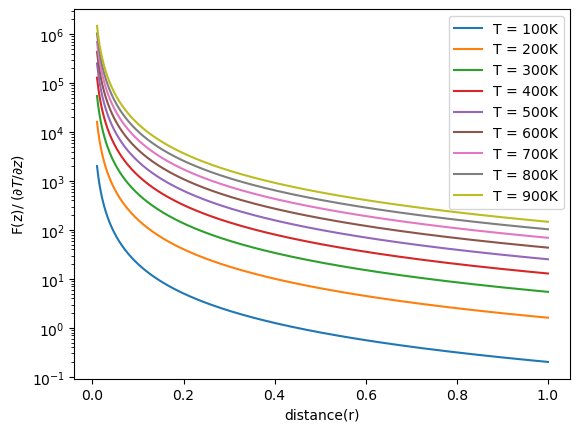

In [29]:
alpha_0 = 1.0
sigma_0 = 0.5
TT = np.arange(100,1000,100)
sigma = 5.67*1e-8
L = 1.0
r = np.linspace(0.01,L,2**10)
for i in range(len(TT)):
    plt.plot(r,abs(Fz(r,L,TT[i])),label = "T = "+str(TT[i])+"K")
plt.legend()
plt.yscale("log")
plt.ylabel("F(z)/"+r"$\;(\partial T/\partial z)$")
plt.xlabel("distance(r)")

Text(0.5, 0, 'T')

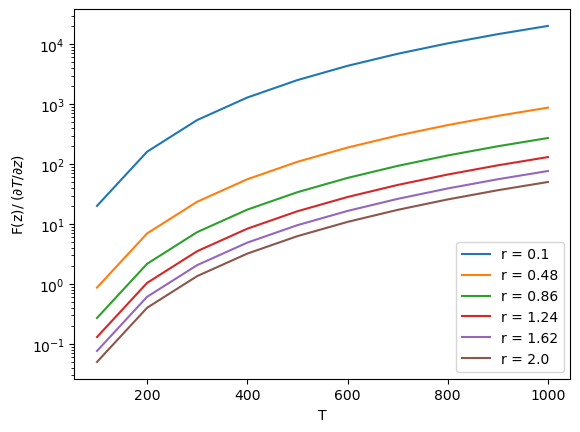

In [30]:
alpha_0 = 1.0
sigma_0 = 0.5
TT = np.arange(100,1100,100)
sigma = 5.67*1e-8
L = 2.0
r = np.linspace(0.1,L,6)
for i in range(len(r)):
    plt.plot(TT,abs(Fz(r[i],L,TT)),label = "r = "+str(np.round(r[i],2)))
plt.legend()
plt.yscale("log")
plt.ylabel("F(z)/"+r"$\;(\partial T/\partial z)$")
plt.xlabel("T")

2)
\begin{equation}\alpha_R= (\alpha_o+\sigma_o)\text{ln}(r)\end{equation}
\begin{equation}F(z) = -\frac{16\sigma T^3}{3(\alpha_o+\sigma_o)\text{ln}(r)}\;\frac{\partial T}{\partial z}\end{equation}

In [31]:
def Fz2(r,L,T):
    return -(16*sigma*T**3)/(3*absorption_coeff_4(r,L))

Text(0.5, 0, 'distance(r)')

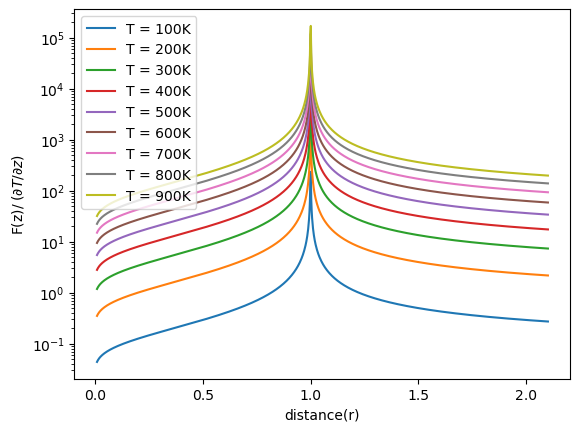

In [32]:
alpha_0 = 1.0
sigma_0 = 0.5
TT = np.arange(100,1000,100)
sigma = 5.67*1e-8
L = 2.1
r = np.linspace(0.01,L,2**10)
for i in range(len(TT)):
    plt.plot(r,abs(Fz2(r,L,TT[i])),label = "T = "+str(TT[i])+"K")
plt.legend()
plt.yscale("log")
plt.ylabel("F(z)/"+r"$\;(\partial T/\partial z)$")
plt.xlabel("distance(r)")

Text(0.5, 0, 'T')

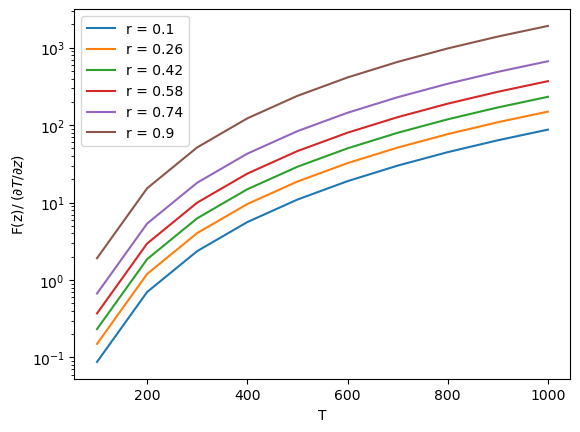

In [33]:
alpha_0 = 1.0
sigma_0 = 0.5
TT = np.arange(100,1100,100)
sigma = 5.67*1e-8
L = 0.9
r = np.linspace(0.1,L,6)
for i in range(len(r)):
    plt.plot(TT,abs(Fz2(r[i],L,TT)),label = "r = "+str(np.round(r[i],2)))
plt.legend()
plt.yscale("log")
plt.ylabel("F(z)/"+r"$\;(\partial T/\partial z)$")
plt.xlabel("T")